In [108]:
# Teo's code to plot the results for coughing detection

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import path

Load one cough probs

In [ ]:
cough_probs = pd.read_csv(".DAP014_cough_probs.csv")

In [3]:
cough_probs['timestamp'] = pd.to_datetime(cough_probs['timestamp'])
cough_probs.set_index('timestamp', inplace=True)

In [4]:
cough_probs

,cough_prob
timestamp,
2019-06-04 10:47:00+05:30,0.999998
2019-06-04 10:48:00+05:30,0.000242
2019-06-04 10:49:00+05:30,0.061240
2019-06-04 10:50:00+05:30,0.002350
2019-06-04 10:51:00+05:30,0.265526
...,...
2019-06-06 11:12:00+05:30,0.005420
2019-06-06 11:13:00+05:30,0.000000
2019-06-06 11:14:00+05:30,0.957719


<AxesSubplot:xlabel='timestamp', ylabel='cough_prob'>

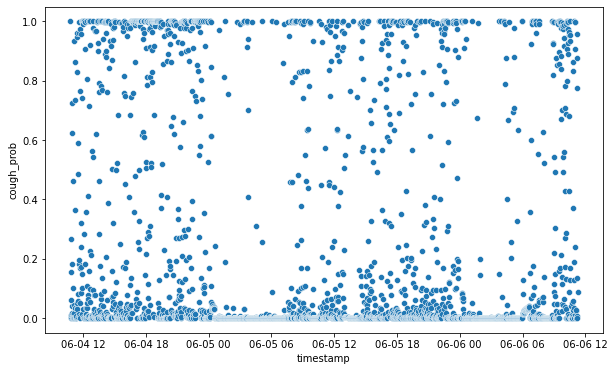

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x=cough_probs.index, y=cough_probs.cough_prob)

In [99]:
trial = 'DAP114.csv'

cough_new_dir = '../data/DAPHNE/pcmci_new'

path_new = path.join(cough_new_dir, trial)

cough_probs = pd.read_csv(path_new)
sure_coughs = cough_probs[cough_probs.cough_prob > 0.99]
cough_probs['timestamp'] = pd.to_datetime(cough_probs['timestamp'])
cough_probs.set_index('timestamp', inplace=True)

In [100]:
trial = 'DAP114(1).csv'

cough_old_dir = '../data/DAPHNE/coughing'
path_old = path.join(cough_old_dir, trial)

coughing = pd.read_csv(path_old)
sure_coughs = coughing[coughing.coughing > 0.99]

dap014_data = pd.read_csv("../data/DAPHNE/respeck_AP/DAP114(1)_respeck_raw.csv")
dap014_data['timestamp'] = pd.to_datetime(dap014_data['timestamp'])
dap014_data.set_index('timestamp', inplace=True)

coughing['timestamp'] = pd.to_datetime(coughing['timestamp'])
coughing.set_index('timestamp', inplace=True)
resampled = dap014_data.resample('1T').mean()[['breathingRate']]
resampled

,breathingRate
timestamp,
2019-12-26 06:03:00,25.886728
2019-12-26 06:04:00,20.705226
2019-12-26 06:05:00,23.620831
2019-12-26 06:06:00,23.685585
2019-12-26 06:07:00,19.506960
...,...
2019-12-28 07:25:00,25.899310
2019-12-28 07:26:00,24.213191
2019-12-28 07:27:00,12.508025


In [101]:
# dap014_data['timestamp'] = pd.to_datetime(dap014_data['timestamp'])
# dap014_data.set_index('timestamp', inplace=True)

In [102]:
resampled = dap014_data.resample('1T').mean()[['breathingRate']]
resampled

,breathingRate
timestamp,
2019-12-26 06:03:00,25.886728
2019-12-26 06:04:00,20.705226
2019-12-26 06:05:00,23.620831
2019-12-26 06:06:00,23.685585
2019-12-26 06:07:00,19.506960
...,...
2019-12-28 07:25:00,25.899310
2019-12-28 07:26:00,24.213191
2019-12-28 07:27:00,12.508025


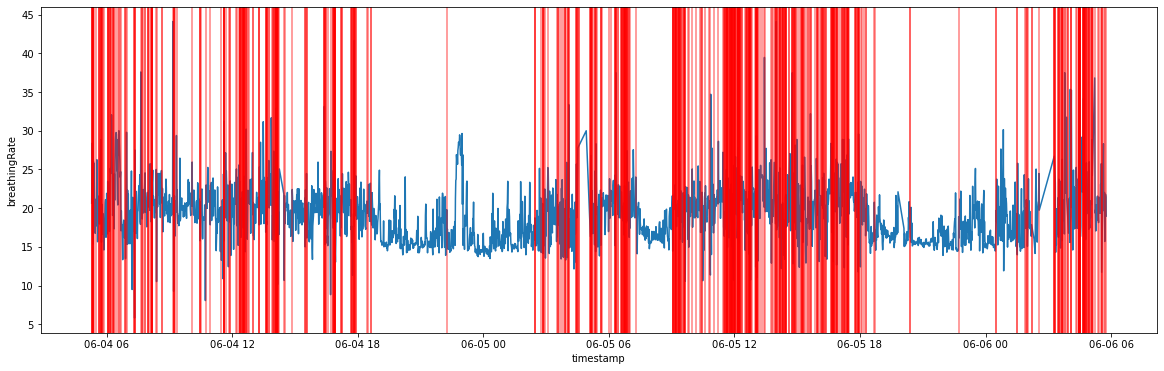

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
sns.lineplot(x=resampled.index, y=resampled.breathingRate, ax=ax)

xpositions = cough_probs[cough_probs.coughing > 0.99].index
for x in xpositions:
    ax.axvline(x=x, c='r', alpha=0.5)

Could also do a scatterplot of breathing rates but each point can have a colour from green to red indicating the probability of a cough in that minute

<AxesSubplot:xlabel='timestamp', ylabel='breathingRate'>

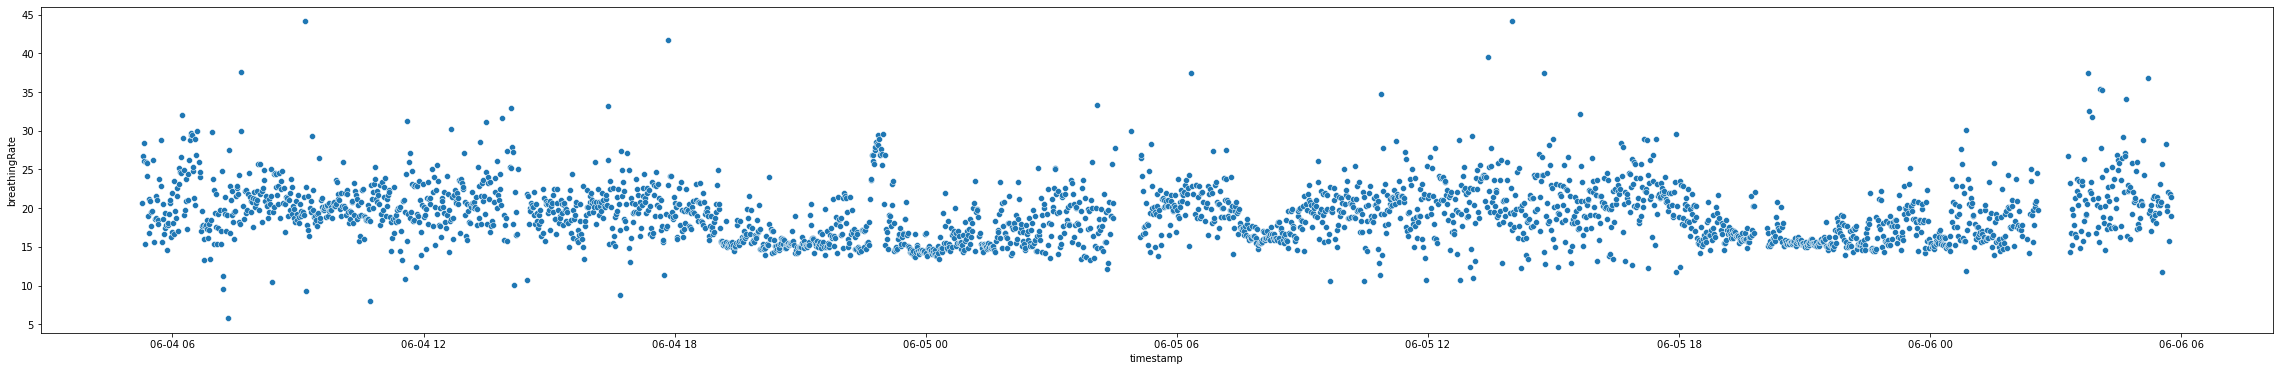

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(40, 6))
sns.scatterplot(x=resampled.index, y=resampled.breathingRate, ax=ax)

In [93]:
from functools import reduce
import operator
def prod(factors):
    return reduce(operator.mul, factors, 1)

In [103]:
cough_probs = cough_probs.resample('1T').agg(lambda x: 1-prod(1-x))
coughing = coughing.resample('1T').agg(lambda x: 1-prod(1-x))

In [104]:
joined = pd.merge(resampled, cough_probs, left_index=True, right_index=True)
joined = pd.merge(joined, coughing, left_index=True, right_index=True)

In [105]:
#sure_coughs = joined[joined.coughing > 0.99]
sure_coughs = joined[joined.cough_prob > 0.99]

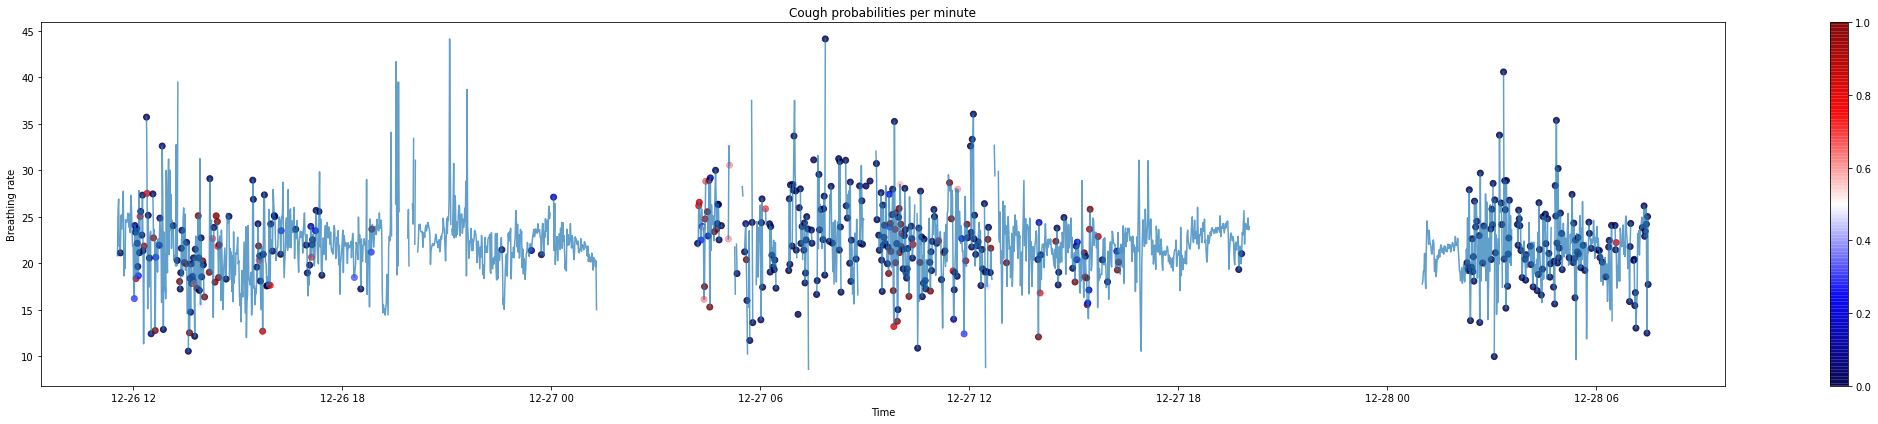

In [107]:
fig = plt.figure(figsize=(30, 6))
plt.plot(joined.index, joined.breathingRate, alpha=0.7)
plt.scatter(sure_coughs.index, sure_coughs.breathingRate, alpha = .8, c = sure_coughs.cough_prob, cmap = 'seismic')
cbar = plt.colorbar()

plt.title("Cough probabilities per minute")
plt.xlabel("Time")
plt.ylabel("Breathing rate")

plt.tight_layout()
plt.savefig("./cough_new114.png", dpi=300)

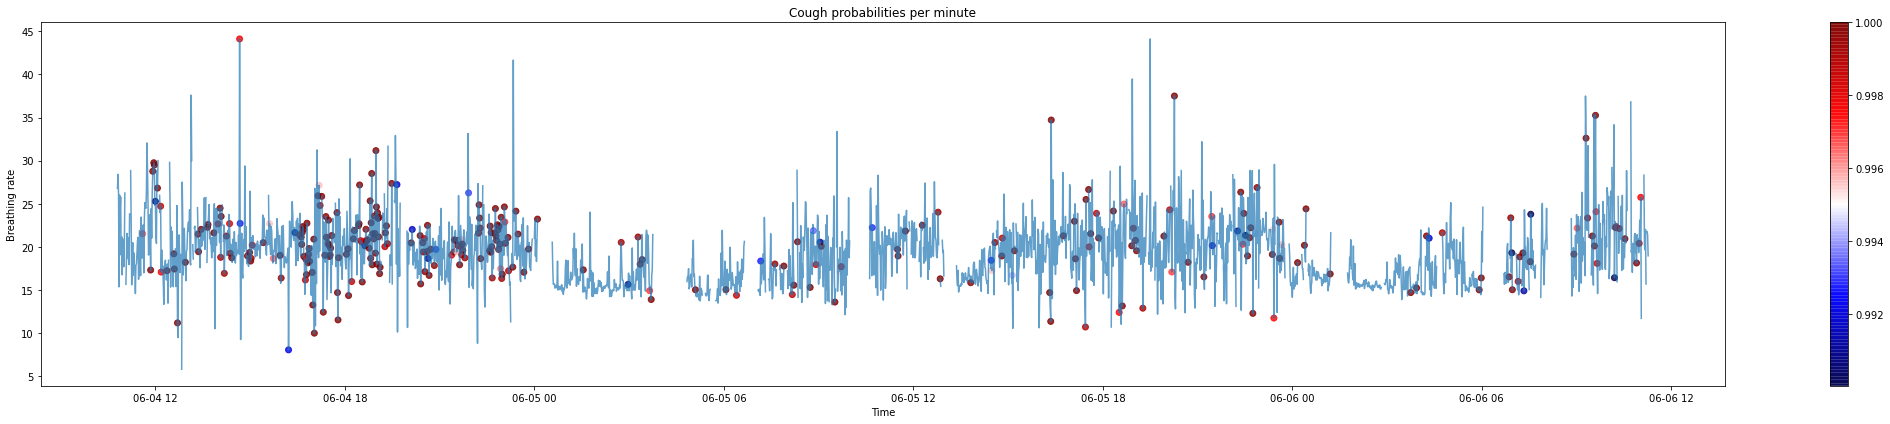

In [15]:
fig = plt.figure(figsize=(30, 6))
plt.plot(joined.index, joined.breathingRate, alpha=0.7)
plt.scatter(sure_coughs.index, sure_coughs.breathingRate, alpha = .8, c = sure_coughs.cough_prob, cmap = 'seismic')
cbar = plt.colorbar()

plt.title("Cough probabilities per minute")
plt.xlabel("Time")
plt.ylabel("Breathing rate")

plt.tight_layout()
plt.savefig("./plots/daphne/DAP014_cough_probs_plot.png", dpi=300)

In [16]:
joined

,breathingRate,cough_prob
timestamp,,
2019-06-04 10:47:00+05:30,NaN,0.999998
2019-06-04 10:48:00+05:30,26.785715,0.000242
2019-06-04 10:49:00+05:30,28.410258,0.061240
2019-06-04 10:50:00+05:30,26.136604,0.002350
2019-06-04 10:51:00+05:30,15.369472,0.265526
...,...,...
2019-06-06 11:12:00+05:30,15.697250,0.005420
2019-06-06 11:13:00+05:30,NaN,0.000000
2019-06-06 11:14:00+05:30,21.783601,0.957719


Correlate cough probability per minute with activity and activity level

In [17]:
def myMode(x):
    if len(x) > 0:
        return x.value_counts().index[0]
    else:
        return np.nan

In [18]:
dap014_data

,x,y,z,breathingSignal,breathingRate,activityLevel,activityType,timestamp.1,pm2_5,subject_id,visit_number
timestamp,,,,,,,,,,,
2019-06-04 10:47:00.054000+05:30,-0.006348,0.020996,-1.000488,0.040270,NaN,0.074466,8,2019-06-04 10:47:00.054000+05:30,NaN,DAP014,2
2019-06-04 10:47:00.134000+05:30,-0.007324,0.021484,-0.999268,0.036773,NaN,0.074466,8,2019-06-04 10:47:00.134000+05:30,NaN,DAP014,2
2019-06-04 10:47:00.214000+05:30,-0.009033,0.021729,-0.997803,0.032515,NaN,0.074466,8,2019-06-04 10:47:00.214000+05:30,NaN,DAP014,2
2019-06-04 10:47:00.294000+05:30,-0.008789,0.020020,-0.998291,0.031305,NaN,0.074466,8,2019-06-04 10:47:00.294000+05:30,NaN,DAP014,2
2019-06-04 10:47:00.374000+05:30,-0.010742,0.021240,-0.996094,0.027690,NaN,0.074466,8,2019-06-04 10:47:00.374000+05:30,NaN,DAP014,2
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-06 11:16:59.672000+05:30,0.204346,-0.990234,-0.011719,NaN,NaN,0.866268,1,2019-06-06 11:16:59.672000+05:30,NaN,DAP014,2
2019-06-06 11:16:59.752000+05:30,0.207520,-0.977539,-0.023926,NaN,NaN,0.866268,1,2019-06-06 11:16:59.752000+05:30,NaN,DAP014,2
2019-06-06 11:16:59.832000+05:30,0.230957,-0.970215,0.045898,NaN,NaN,0.866268,1,2019-06-06 11:16:59.832000+05:30,NaN,DAP014,2


In [19]:
minute_data = dap014_data.resample('1min').agg({'breathingRate': 'mean', 'activityLevel': 'mean', 
                                              'activityType': myMode})
    

In [20]:
joined = pd.merge(minute_data, cough_probs, left_index=True, right_index=True)

In [21]:
joined

,breathingRate,activityLevel,activityType,cough_prob
timestamp,,,,
2019-06-04 10:47:00+05:30,NaN,0.306409,8.0,0.999998
2019-06-04 10:48:00+05:30,26.785715,0.595856,1.0,0.000242
2019-06-04 10:49:00+05:30,28.410258,0.385992,0.0,0.061240
2019-06-04 10:50:00+05:30,26.136604,0.206976,0.0,0.002350
2019-06-04 10:51:00+05:30,15.369472,0.076481,0.0,0.265526
...,...,...,...,...
2019-06-06 11:12:00+05:30,15.697250,0.405781,1.0,0.005420
2019-06-06 11:13:00+05:30,NaN,0.622895,1.0,0.000000
2019-06-06 11:14:00+05:30,21.783601,0.312808,1.0,0.957719


Should add airspeck data

In [22]:
airspeck_data = pd.read_csv("../../../projects.nosync/daphne/airspeck_data_agg.csv")

In [23]:
airspeck_data['timestamp'] = pd.to_datetime(airspeck_data['timestamp'])

In [24]:
airspeck_data.set_index('timestamp', inplace=True)

In [25]:
joined['pm2_5'] = airspeck_data['pm2_5']

In [26]:
joined.groupby('activityType').mean()

,breathingRate,activityLevel,cough_prob,pm2_5
activityType,,,,
0.0,20.087420,0.153818,0.278063,107.871992
1.0,23.520810,0.468187,0.163299,95.450217
2.0,18.899011,0.042621,0.310526,51.302472
3.0,NaN,0.007841,0.010359,49.814387
4.0,21.303358,0.121486,0.350670,89.522756
5.0,20.347687,0.093824,0.252430,86.109252
6.0,17.300628,0.028410,0.168020,42.164114
7.0,16.499796,0.021553,0.075156,38.415292
8.0,19.764205,0.023269,0.301954,43.946927


In [27]:
hourly_means = joined.resample('1h').mean()

No handles with labels found to put in legend.


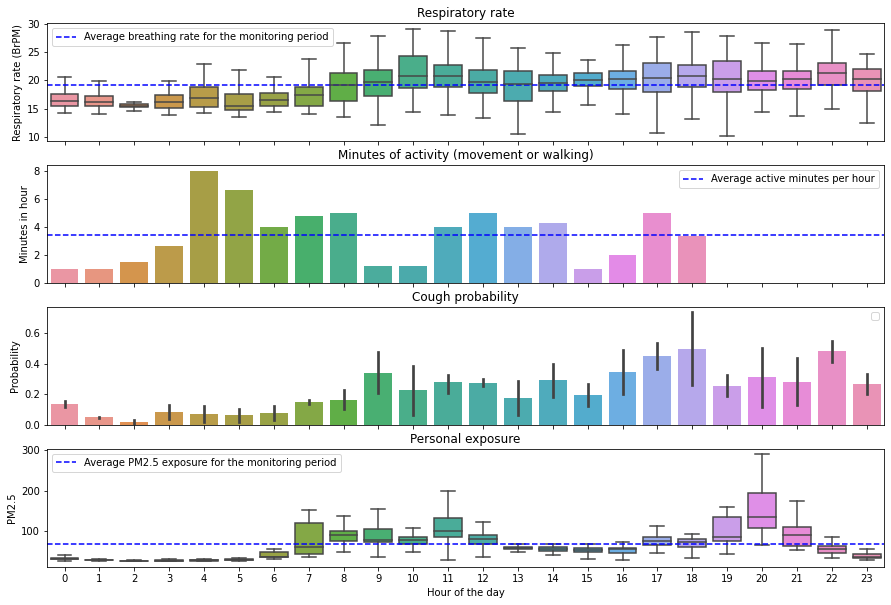

In [28]:
joined['helper'] = 1
    
subject_mean = joined['breathingRate'].mean()
y_label = "Breathing rate (BrPM)"
title_part = "breathing rate"
y_lim = (10, 35)

hourly_avg_br = joined.groupby(joined.index.hour).mean()

# hourly average 
hour_act_groups = joined.groupby(['activityType', joined.index.hour, joined.index.date])[['helper']].count()
hour_mov_walk_groups = hour_act_groups[hour_act_groups.index.get_level_values('activityType').isin([9, 1])].groupby(level=1).mean()

fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

# br
sns.boxplot(x=joined.index.hour, y=joined.breathingRate, ax=ax[0], showfliers=False)
#     sns.barplot(x=hourly_avg_br.index, y='breathingRate', data=hourly_avg_br, ax=ax[0])
ax[0].axhline(y=subject_mean, linestyle='--', color='blue', label=f'Average breathing rate for the monitoring period')
#     ax[0].set_ylim(y_lim)
ax[0].set_ylabel("Respiratory rate (BrPM)")
ax[0].set_xlabel("")
ax[0].set_title("Respiratory rate")
ax[0].legend()

# active minutes
sns.barplot(x=hour_mov_walk_groups.index, y='helper', data=hour_mov_walk_groups, ax=ax[1])
ax[1].axhline(y=hour_mov_walk_groups.mean()['helper'], linestyle='--', color='blue', label='Average active minutes per hour')
ax[1].set_xlabel("")
ax[1].set_ylabel("Minutes in hour")
ax[1].set_title(f"Minutes of activity (movement or walking)")
ax[1].legend()

# cough probs
# sns.boxplot(x=joined.index.hour, y=joined.cough_prob, ax=ax[2], showfliers=True)
sns.barplot(x=hourly_means.index.hour, y=hourly_means['cough_prob'], ax=ax[2])
# ax[0].axhline(y=subject_mean, linestyle='--', color='blue', label=f'Average breathing rate for the monitoring period')
#     ax[0].set_ylim(y_lim)
ax[2].set_ylabel("Probability")
ax[2].set_xlabel("")
ax[2].set_title("Cough probability")
ax[2].legend()

# pm25
#     sns.barplot(x=hourly_avg_br.index, y='pm2_5', data=hourly_avg_br, ax=ax[2])
sns.boxplot(x=joined.index.hour, y=joined.pm2_5, ax=ax[3], showfliers=False)
ax[3].axhline(y=joined['pm2_5'].mean(), linestyle='--', color='blue', label=f'Average PM2.5 exposure for the monitoring period')
# ax[2].set_ylim(y_lim)
ax[3].set_ylabel("PM2.5")
ax[3].set_xlabel("Hour of the day")
ax[3].set_title("Personal exposure")
ax[3].legend()

In [46]:
joined.groupby("activityType").get_group(8)

,breathingRate,activityLevel,activityType,cough_prob,helper,pm2_5
timestamp,,,,,,
2019-06-04 10:47:00+05:30,NaN,0.306409,8.0,9.999982e-01,1,83.568664
2019-06-04 16:00:00+05:30,22.371829,0.032043,8.0,4.524928e-01,1,48.557624
2019-06-04 16:03:00+05:30,22.487193,0.015051,8.0,1.318214e-02,1,49.873262
2019-06-04 16:04:00+05:30,18.979153,0.019487,8.0,2.425141e-02,1,48.588782
2019-06-04 17:02:00+05:30,10.000000,0.068495,8.0,1.000000e+00,1,51.714179
...,...,...,...,...,...,...
2019-06-06 07:03:00+05:30,NaN,0.006593,8.0,7.901135e-02,1,42.846921
2019-06-06 07:04:00+05:30,NaN,0.033299,8.0,1.034987e-01,1,42.953253
2019-06-06 07:13:00+05:30,NaN,0.012391,8.0,2.331338e-03,1,91.063228


Do this for all subjects

In [36]:
respeck_data = pd.read_csv("../../../projects.nosync/daphne/respeck_data_agg.csv")
airspeck_data = pd.read_csv("../../../projects.nosync/daphne/airspeck_data_agg.csv")

In [37]:
airspeck_data['timestamp'] = pd.to_datetime(airspeck_data['timestamp'])

********************************************************************************
DAP014
********************************************************************************
Loading coughs
Setting timestamp
Plotting time series with coughs
********************************************************************************
DAP075
********************************************************************************
Loading coughs
Setting timestamp
Plotting time series with coughs
********************************************************************************
DAP080
********************************************************************************
Loading coughs
Setting timestamp
Plotting time series with coughs
********************************************************************************
DAP094
********************************************************************************
Loading coughs
Setting timestamp
Plotting time series with coughs
************************************************************

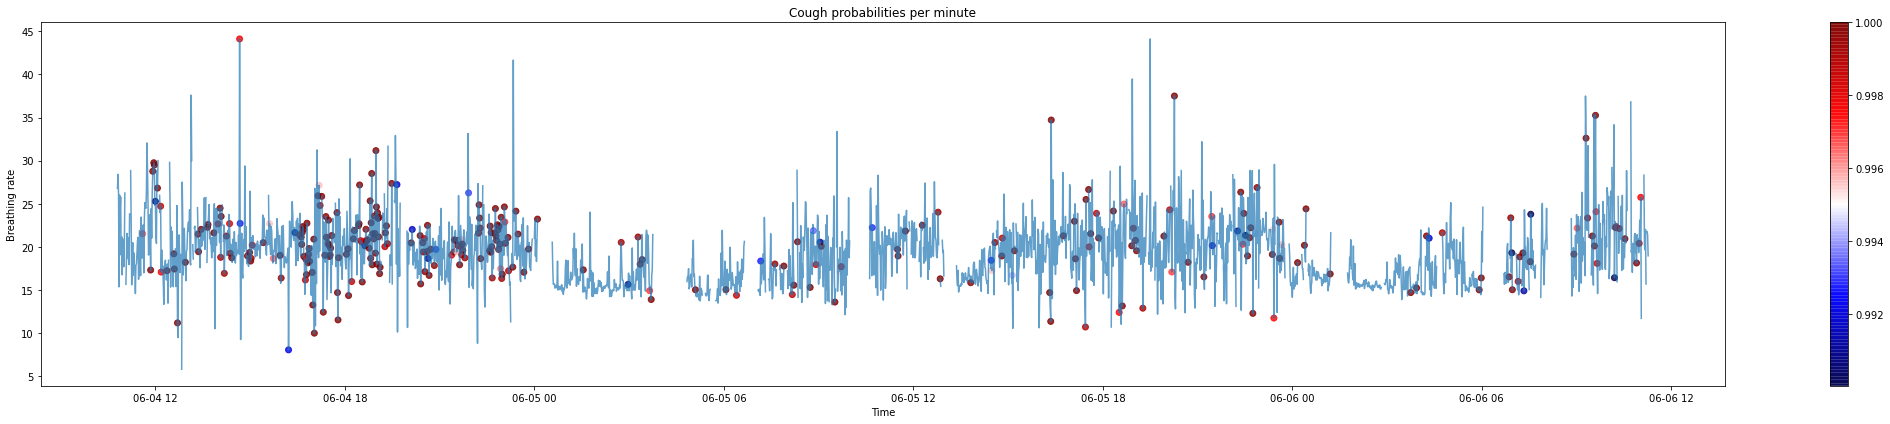

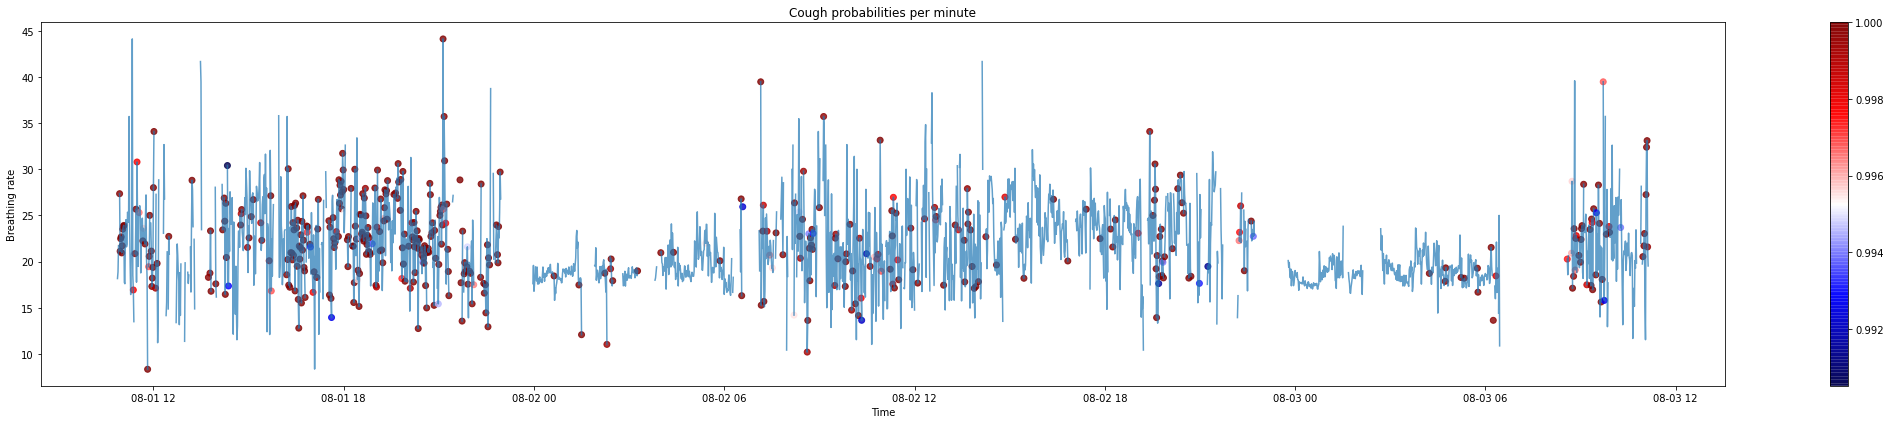

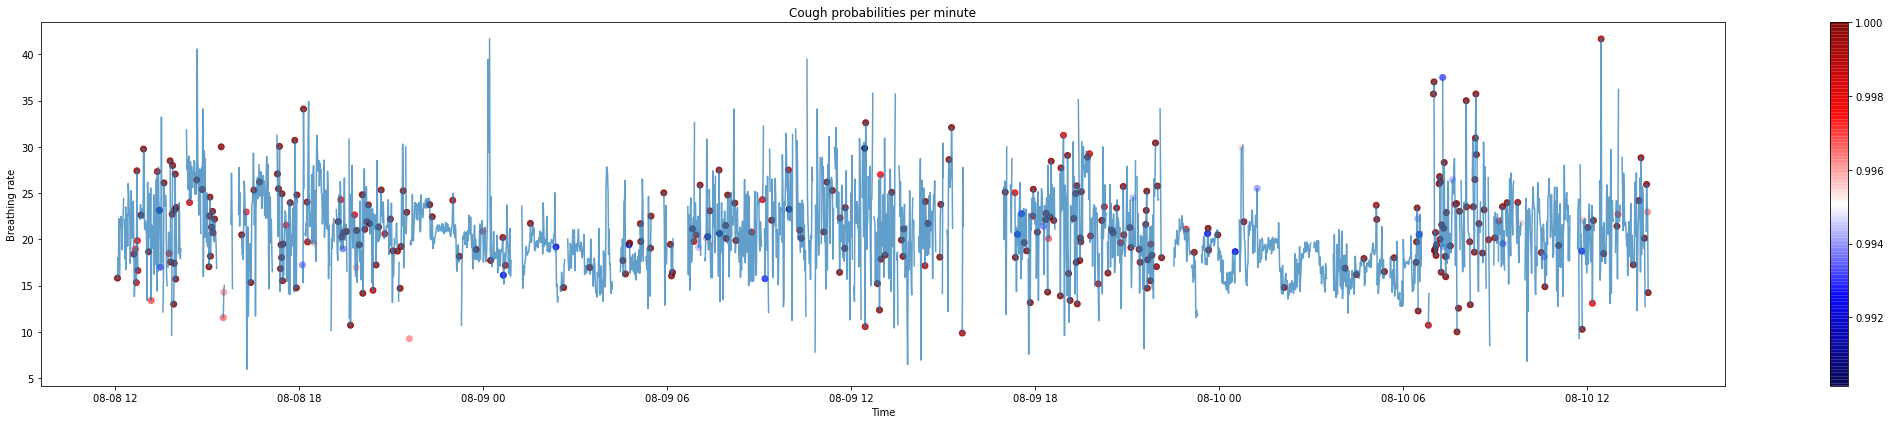

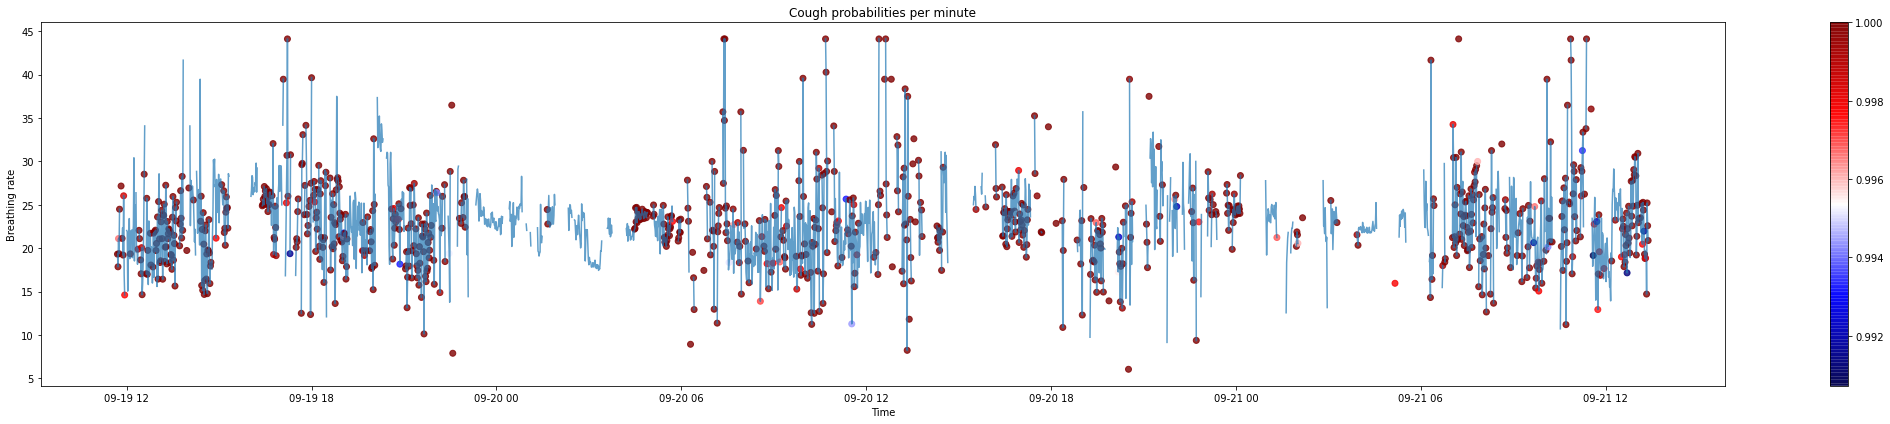

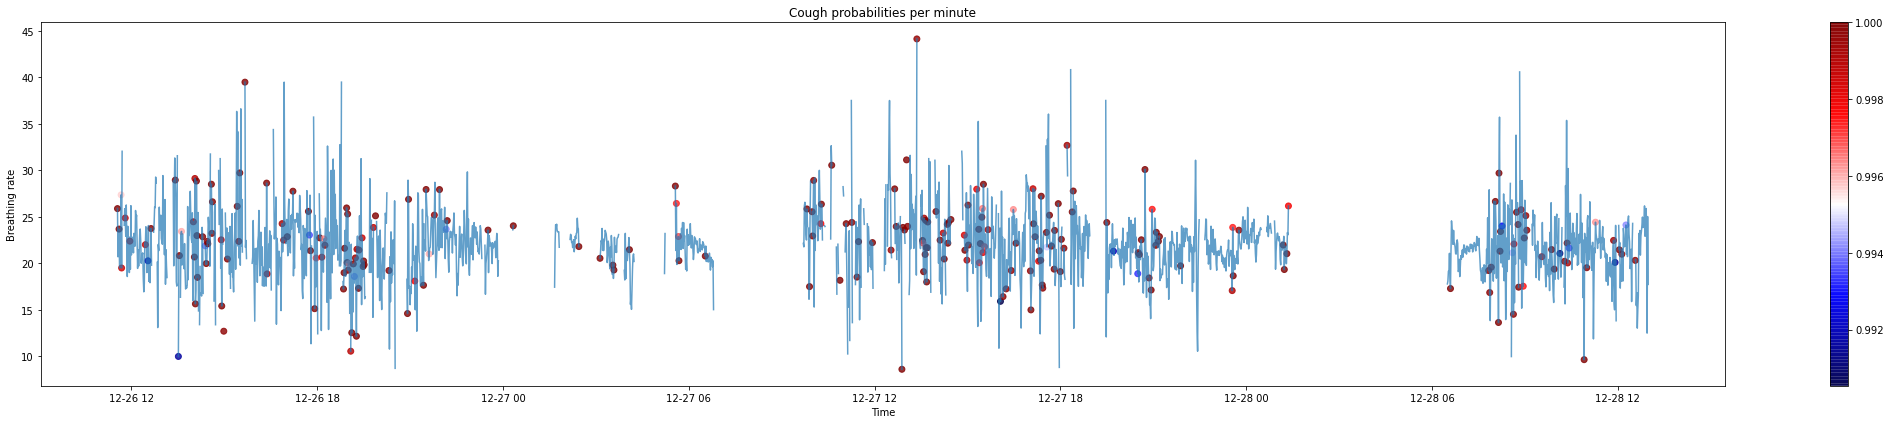

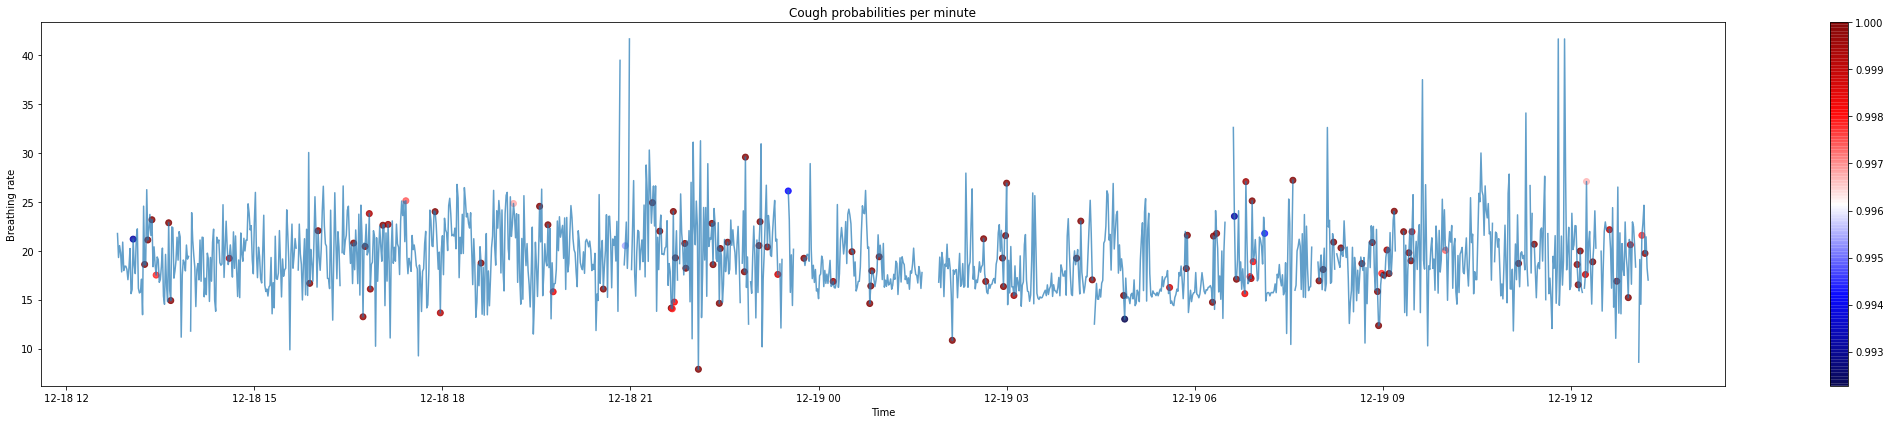

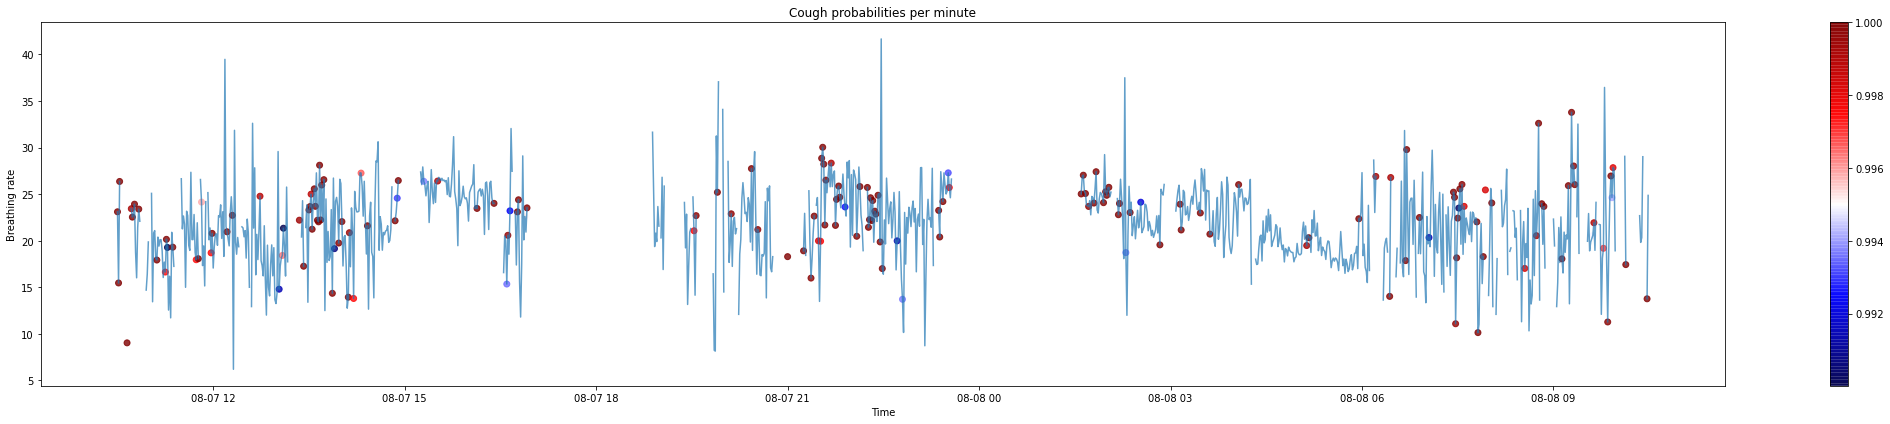

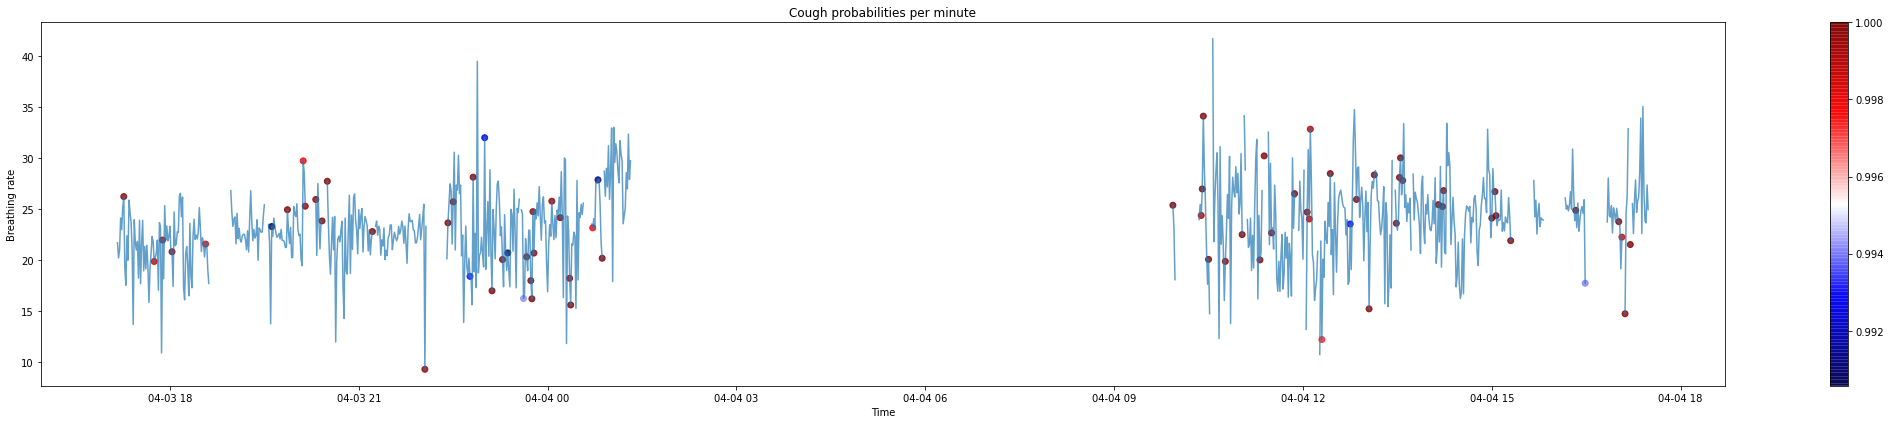

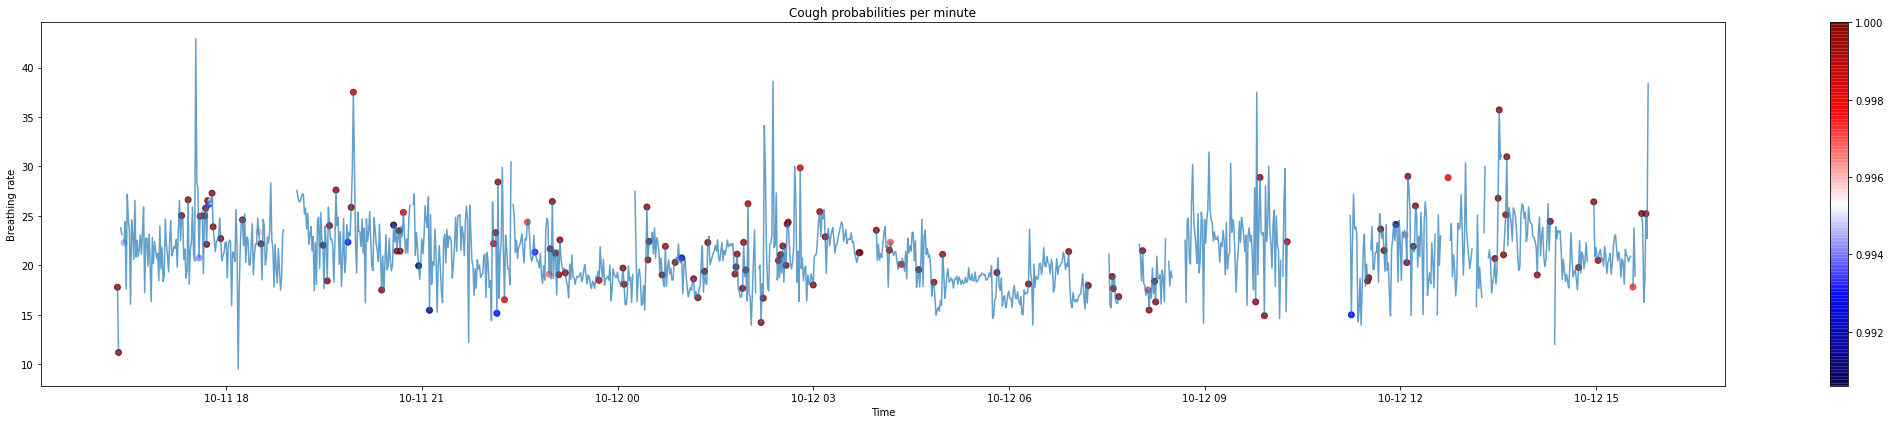

In [39]:
for sid, subject_data in respeck_data.groupby("subject_id"):
    print("*"*80)
    print(sid)
    print("*"*80)
    
    print("Loading coughs")
    cough_probs = pd.read_csv(f"./plots/daphne/{sid}_cough_probs.csv")
    
    cough_probs['timestamp'] = pd.to_datetime(cough_probs['timestamp'])
    cough_probs.set_index('timestamp', inplace=True)
    
    print("Setting timestamp")
    subject_data['timestamp'] = pd.to_datetime(subject_data['timestamp'])
    subject_data.set_index('timestamp', inplace=True)
    
    subject_airspeck = airspeck_data[airspeck_data.subject_id == sid]
    subject_airspeck.set_index('timestamp', inplace=True)
    
    resampled = subject_data.resample('1T').mean()[['breathingRate']]
    
    joined = pd.merge(resampled, cough_probs, left_index=True, right_index=True)
    sure_coughs = joined[joined.cough_prob > 0.99]
    
    print("Plotting time series with coughs")
    # plot ts
    fig = plt.figure(figsize=(30, 6))
    plt.plot(joined.index, joined.breathingRate, alpha=0.7)
    plt.scatter(sure_coughs.index, sure_coughs.breathingRate, alpha = .8, c = sure_coughs.cough_prob, cmap = 'seismic')
    cbar = plt.colorbar()

    plt.title("Cough probabilities per minute")
    plt.xlabel("Time")
    plt.ylabel("Breathing rate")

    plt.tight_layout()
    plt.savefig(f"./plots/daphne/{sid}_cough_probs_plot.png", dpi=300)
    

Plot the comparative plots

********************************************************************************
DAP014
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


********************************************************************************
DAP075
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


********************************************************************************
DAP080
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


********************************************************************************
DAP094
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


********************************************************************************
DAP114
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


********************************************************************************
DMC032
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


********************************************************************************
DMC051
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


********************************************************************************
DMC052
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


********************************************************************************
DMC082
********************************************************************************
Loading coughs
Setting timestamp
Plotting comparative plots


No handles with labels found to put in legend.


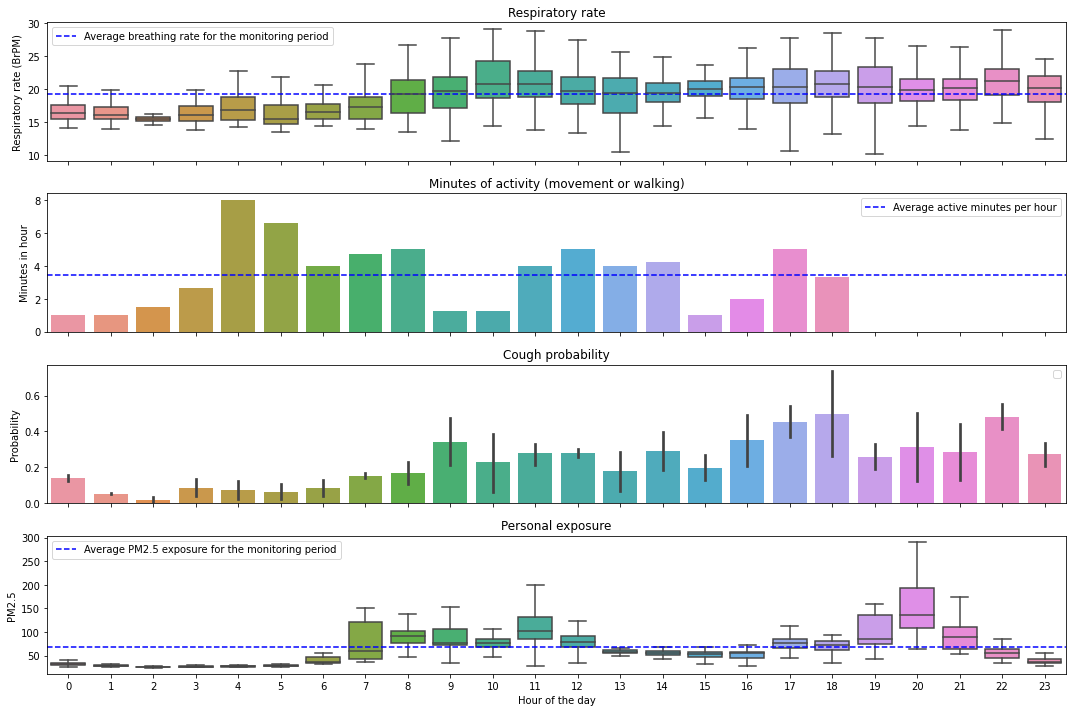

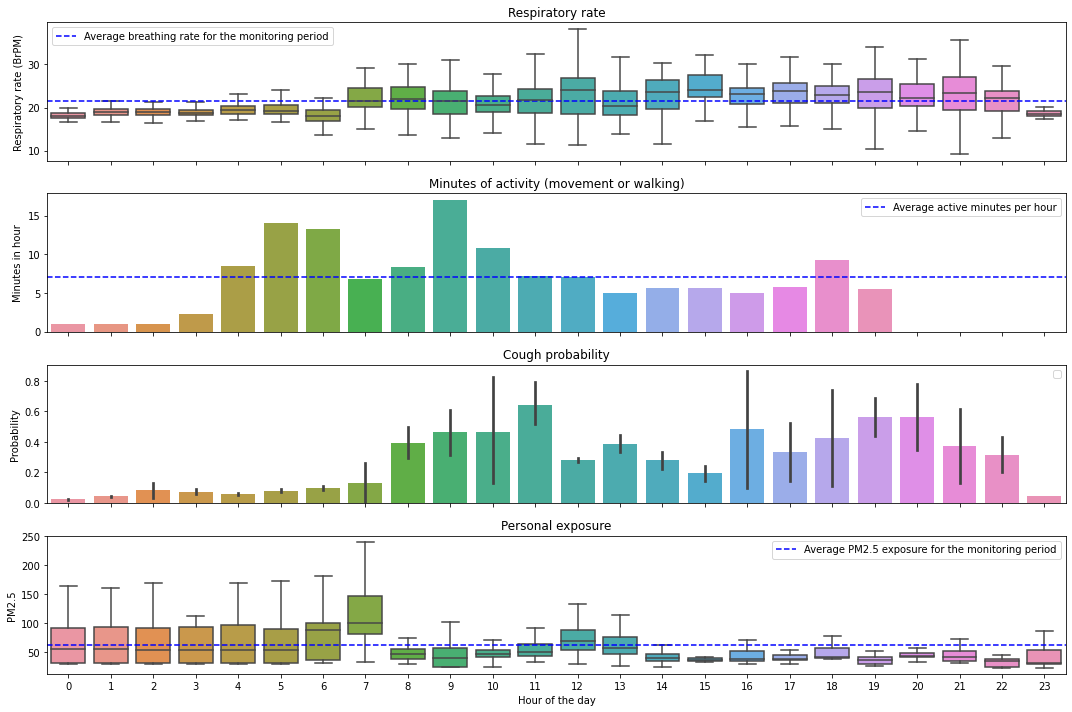

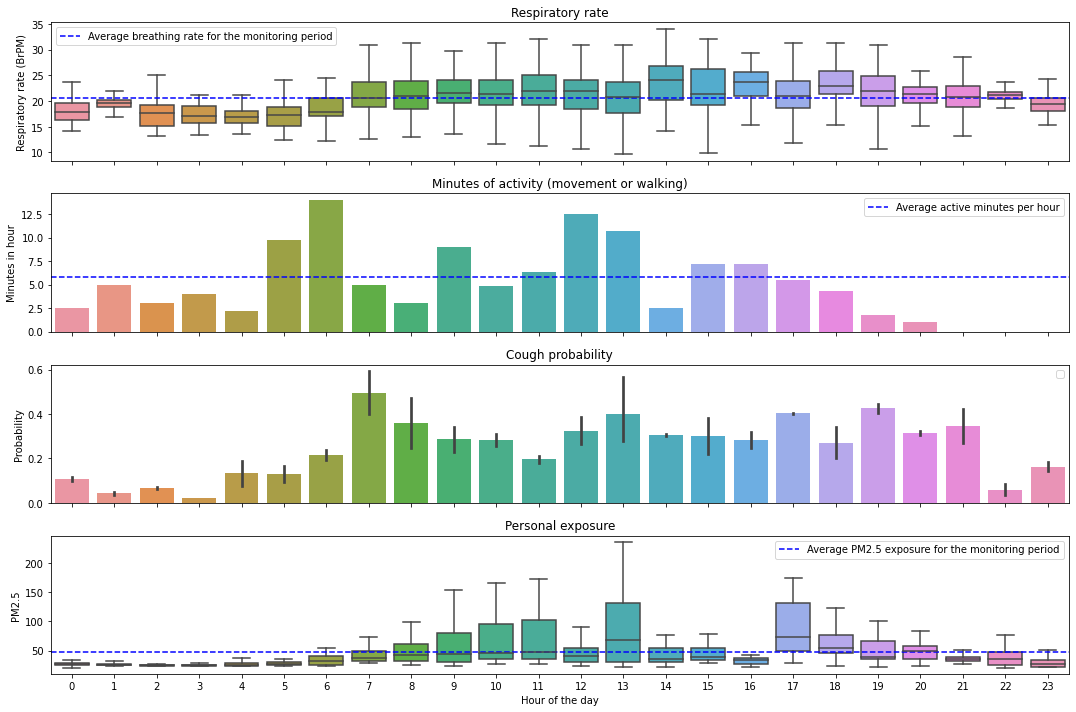

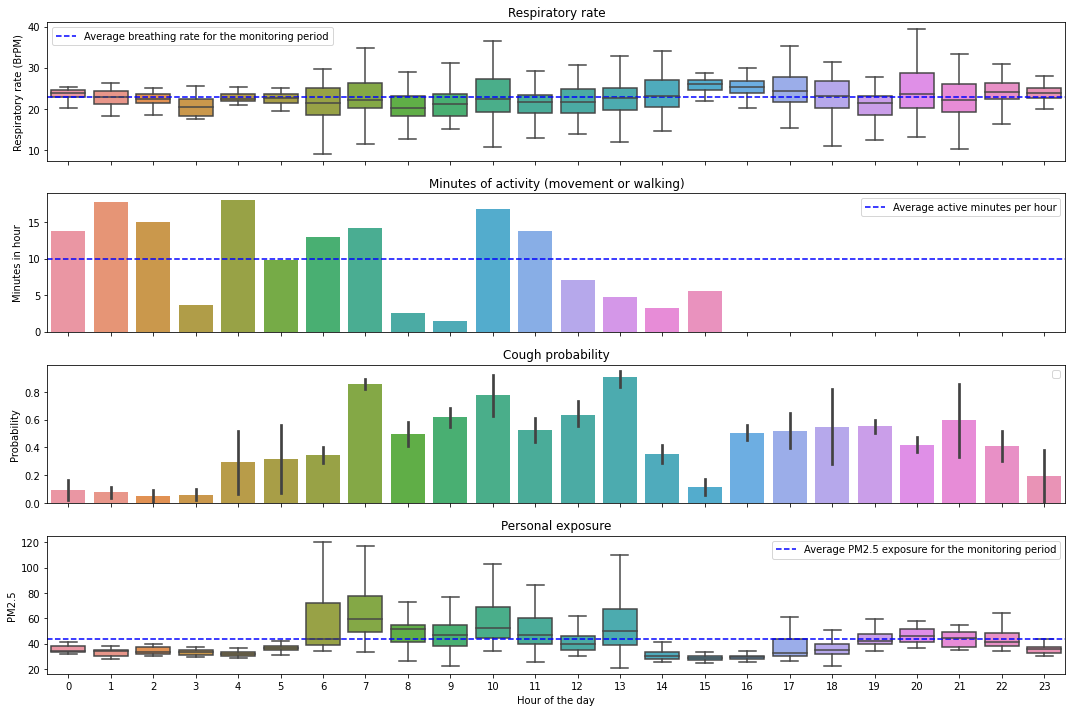

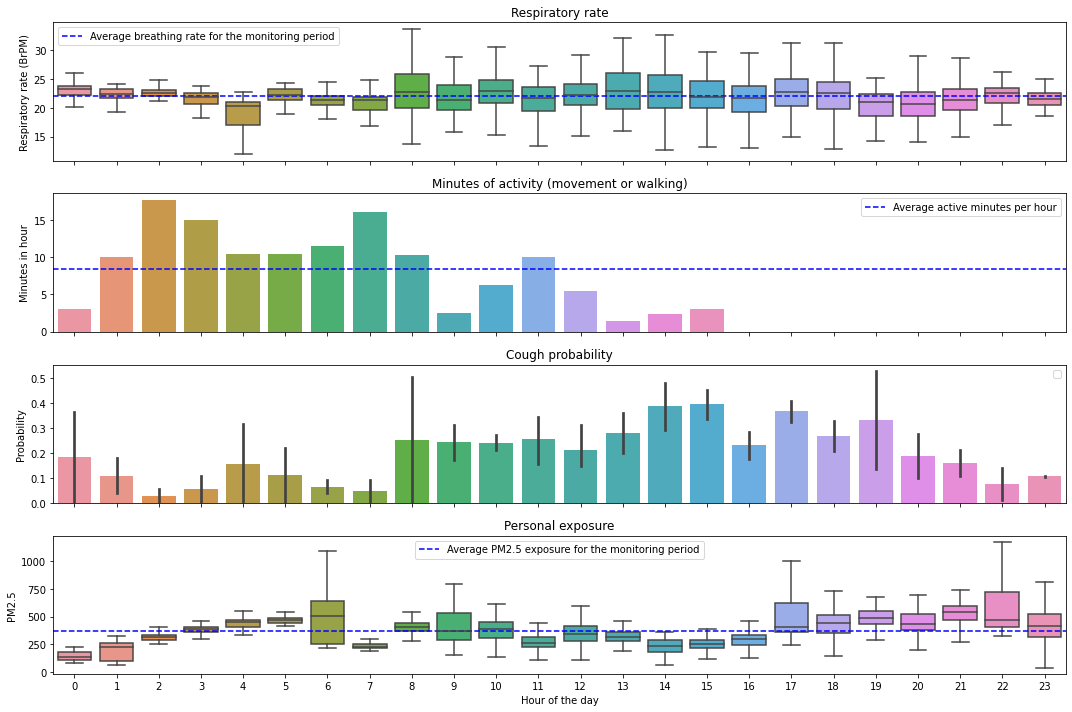

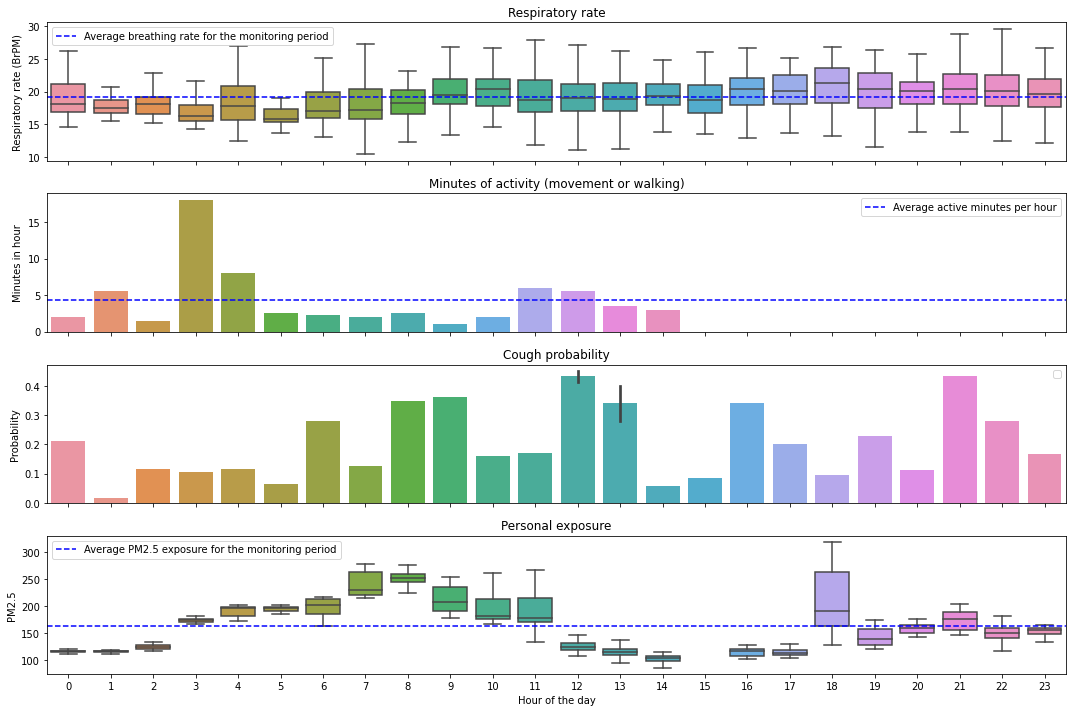

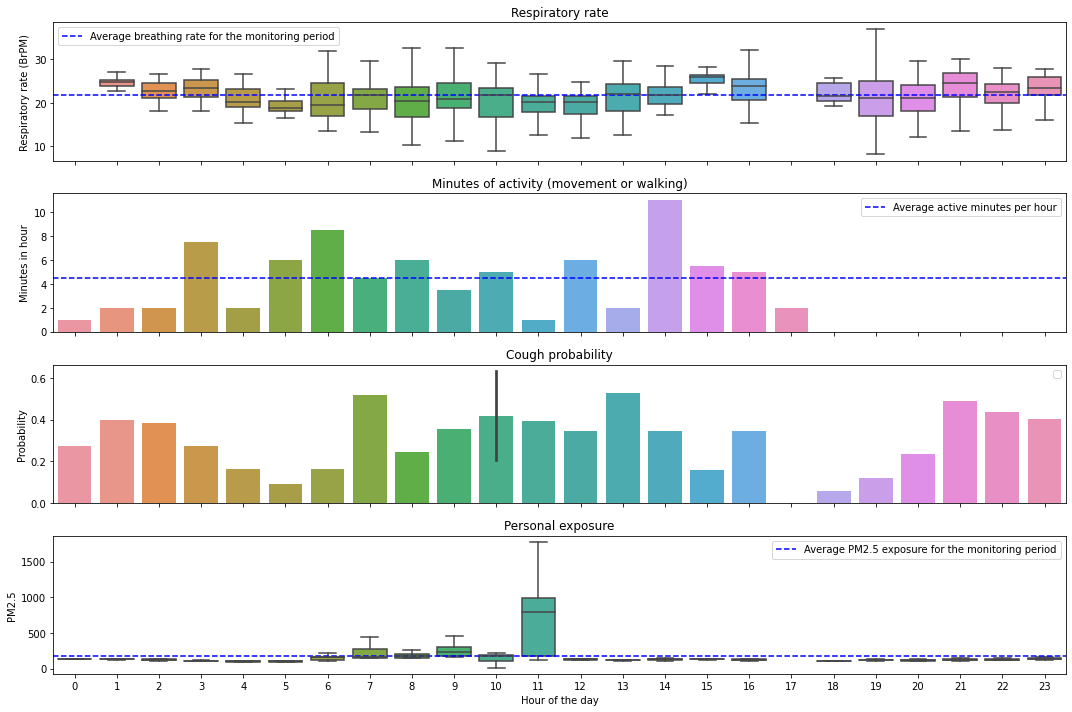

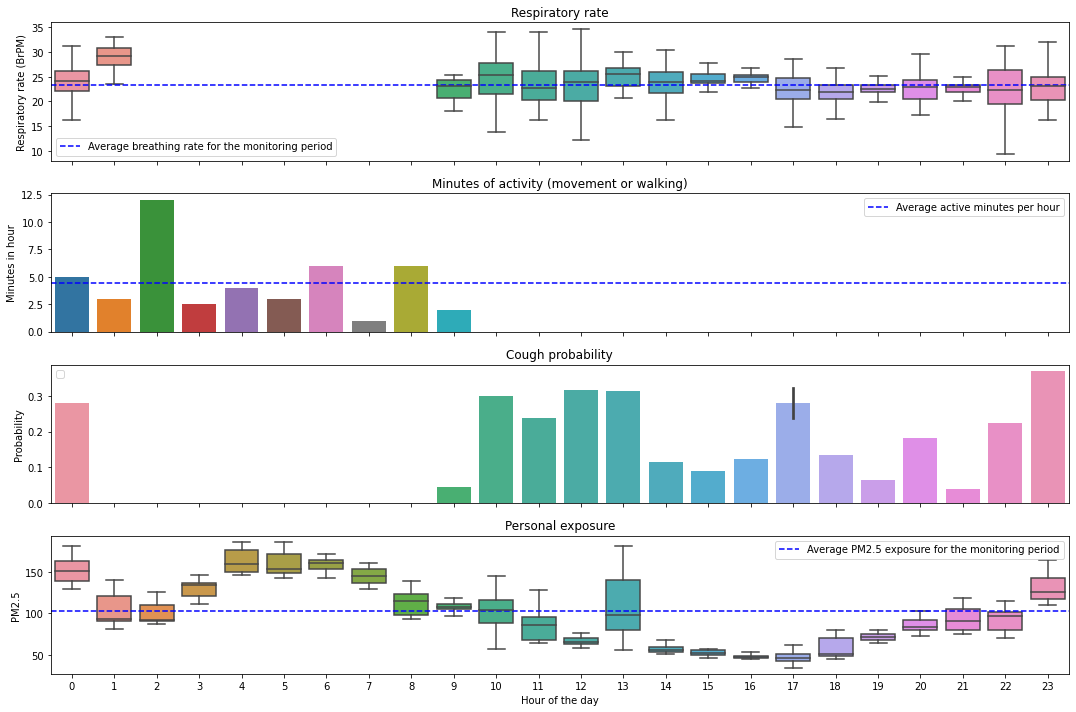

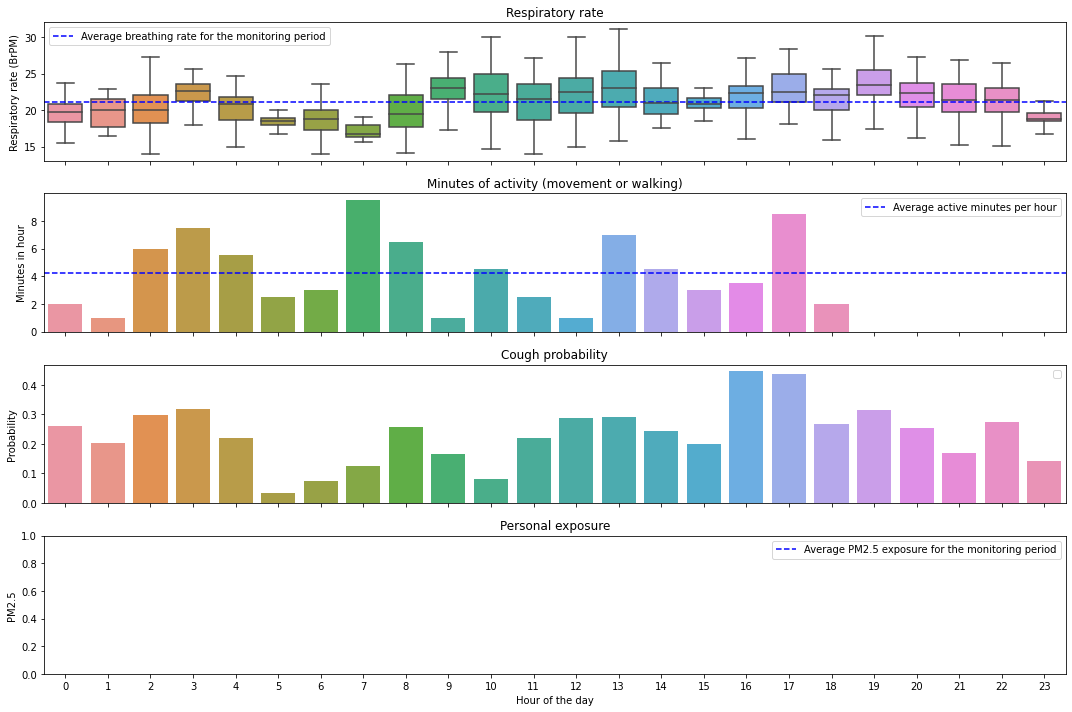

In [41]:
for sid, subject_data in respeck_data.groupby("subject_id"):
    print("*"*80)
    print(sid)
    print("*"*80)
    
    print("Loading coughs")
    cough_probs = pd.read_csv(f"./plots/daphne/{sid}_cough_probs.csv")
    
    cough_probs['timestamp'] = pd.to_datetime(cough_probs['timestamp'])
    cough_probs.set_index('timestamp', inplace=True)
    
    print("Setting timestamp")
    subject_data['timestamp'] = pd.to_datetime(subject_data['timestamp'])
    subject_data.set_index('timestamp', inplace=True)
    
    subject_airspeck = airspeck_data[airspeck_data.subject_id == sid]
    subject_airspeck.set_index('timestamp', inplace=True)
    
    resampled = subject_data.resample('1T').mean()[['breathingRate']]
    
    joined = pd.merge(resampled, cough_probs, left_index=True, right_index=True)
    sure_coughs = joined[joined.cough_prob > 0.99]
    
    # plot comparative
    minute_data = subject_data.resample('1min').agg({'breathingRate': 'mean', 'activityLevel': 'mean', 
                                              'activityType': myMode})
     
    joined = pd.merge(minute_data, cough_probs, left_index=True, right_index=True)
    joined['pm2_5'] = subject_airspeck['pm2_5']
    hourly_means = joined.resample('1h').mean()
    
    joined['helper'] = 1
    
    subject_mean = joined['breathingRate'].mean()
    y_label = "Breathing rate (BrPM)"
    title_part = "breathing rate"
    y_lim = (10, 35)

    hourly_avg_br = joined.groupby(joined.index.hour).mean()

    # hourly average 
    hour_act_groups = joined.groupby(['activityType', joined.index.hour, joined.index.date])[['helper']].count()
    hour_mov_walk_groups = hour_act_groups[hour_act_groups.index.get_level_values('activityType').isin([9, 1])].groupby(level=1).mean()
    
    print("Plotting comparative plots")
    fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True)

    # br
    sns.boxplot(x=joined.index.hour, y=joined.breathingRate, ax=ax[0], showfliers=False)
    #     sns.barplot(x=hourly_avg_br.index, y='breathingRate', data=hourly_avg_br, ax=ax[0])
    ax[0].axhline(y=subject_mean, linestyle='--', color='blue', label=f'Average breathing rate for the monitoring period')
    #     ax[0].set_ylim(y_lim)
    ax[0].set_ylabel("Respiratory rate (BrPM)")
    ax[0].set_xlabel("")
    ax[0].set_title("Respiratory rate")
    ax[0].legend()

    # active minutes
    sns.barplot(x=hour_mov_walk_groups.index, y='helper', data=hour_mov_walk_groups, ax=ax[1])
    ax[1].axhline(y=hour_mov_walk_groups.mean()['helper'], linestyle='--', color='blue', label='Average active minutes per hour')
    ax[1].set_xlabel("")
    ax[1].set_ylabel("Minutes in hour")
    ax[1].set_title(f"Minutes of activity (movement or walking)")
    ax[1].legend()

    # cough probs
    # sns.boxplot(x=joined.index.hour, y=joined.cough_prob, ax=ax[2], showfliers=True)
    sns.barplot(x=hourly_means.index.hour, y=hourly_means['cough_prob'], ax=ax[2])
    # ax[0].axhline(y=subject_mean, linestyle='--', color='blue', label=f'Average breathing rate for the monitoring period')
    #     ax[0].set_ylim(y_lim)
    ax[2].set_ylabel("Probability")
    ax[2].set_xlabel("")
    ax[2].set_title("Cough probability")
    ax[2].legend()

    # pm25
    #     sns.barplot(x=hourly_avg_br.index, y='pm2_5', data=hourly_avg_br, ax=ax[2])
    sns.boxplot(x=joined.index.hour, y=joined.pm2_5, ax=ax[3], showfliers=False)
    ax[3].axhline(y=joined['pm2_5'].mean(), linestyle='--', color='blue', label=f'Average PM2.5 exposure for the monitoring period')
    # ax[2].set_ylim(y_lim)
    ax[3].set_ylabel("PM2.5")
    ax[3].set_xlabel("Hour of the day")
    ax[3].set_title("Personal exposure")
    ax[3].legend()
    
    plt.tight_layout()
    plt.savefig(f"./plots/daphne/{sid}_cough_probs_comparison_plot.png", dpi=300)

Load all cough probabilities and do some cohort level analysis

In [42]:
all_coughs = []

In [43]:
for sid, subject_data in respeck_data.groupby("subject_id"):
    print("*"*80)
    print(sid)
    print("*"*80)
    
    print("Loading coughs")
    cough_probs = pd.read_csv(f"./plots/daphne/{sid}_cough_probs.csv")
    cough_probs['timestamp'] = pd.to_datetime(cough_probs['timestamp'])
    
    cough_probs['subject_id'] = sid
    
    all_coughs.append(cough_probs)

********************************************************************************
DAP014
********************************************************************************
Loading coughs
********************************************************************************
DAP075
********************************************************************************
Loading coughs
********************************************************************************
DAP080
********************************************************************************
Loading coughs
********************************************************************************
DAP094
********************************************************************************
Loading coughs
********************************************************************************
DAP114
********************************************************************************
Loading coughs
********************************************************************************

In [44]:
all_coughs = pd.concat(all_coughs)

In [45]:
all_coughs

,timestamp,cough_prob,subject_id
0,2019-06-04 10:47:00+05:30,0.999998,DAP014
1,2019-06-04 10:48:00+05:30,0.000242,DAP014
2,2019-06-04 10:49:00+05:30,0.061240,DAP014
3,2019-06-04 10:50:00+05:30,0.002350,DAP014
4,2019-06-04 10:51:00+05:30,0.265526,DAP014
...,...,...,...
1425,2019-10-12 15:45:00+05:30,0.356581,DMC082
1426,2019-10-12 15:46:00+05:30,1.000000,DMC082
1427,2019-10-12 15:47:00+05:30,0.000042,DMC082
1428,2019-10-12 15:48:00+05:30,0.355263,DMC082


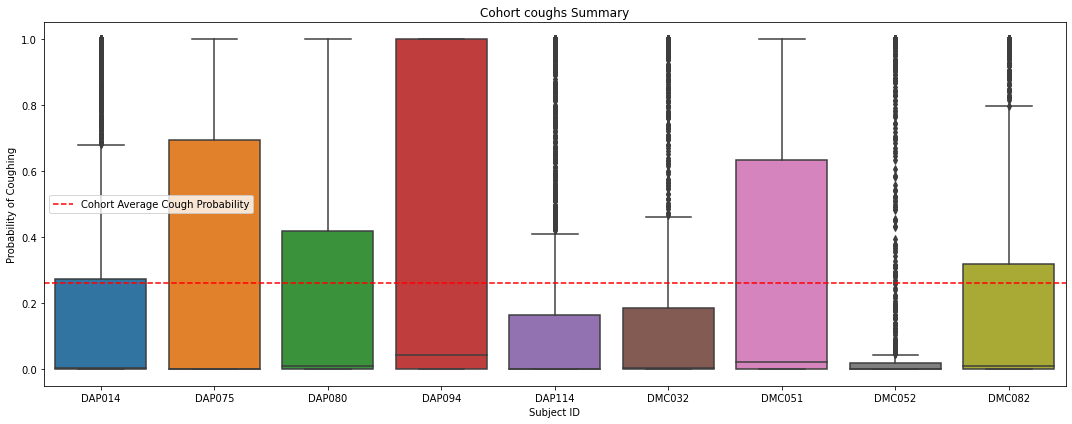

In [47]:
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x='subject_id', y='cough_prob', data=all_coughs)
ax.axhline(y=all_coughs['cough_prob'].mean(), color='r', linestyle='--', label='Cohort Average Cough Probability')
ax.set_xlabel("Subject ID")
ax.set_ylabel("Probability of Coughing")
ax.set_title("Cohort coughs Summary")
plt.legend()
plt.tight_layout()
# plt.savefig("./plots/daphne/cohort_br_summary.png", dpi=300)

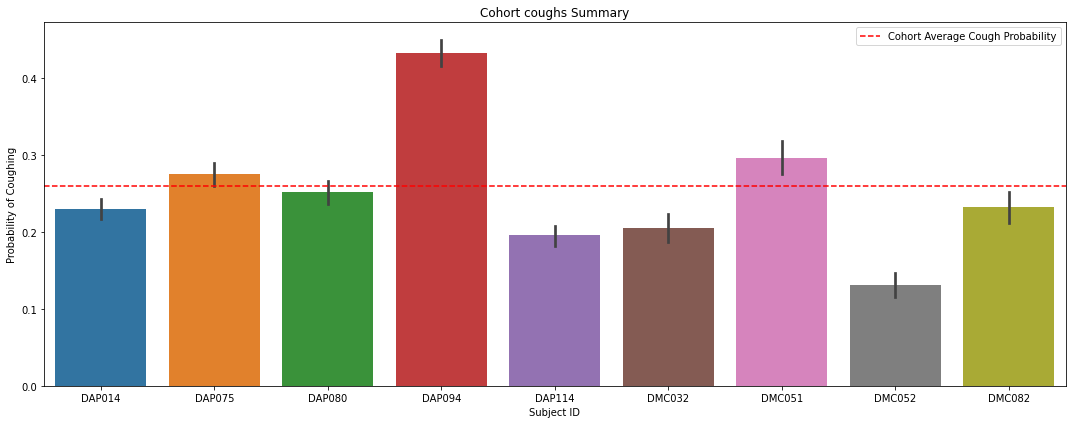

In [49]:
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x='subject_id', y='cough_prob', data=all_coughs)
ax.axhline(y=all_coughs['cough_prob'].mean(), color='r', linestyle='--', label='Cohort Average Cough Probability')
ax.set_xlabel("Subject ID")
ax.set_ylabel("Probability of Coughing")
ax.set_title("Cohort coughs Summary")
plt.legend()
plt.tight_layout()
plt.savefig("./plots/daphne/cohort_cough_summary.png", dpi=300)

In [50]:
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [52]:
all_coughs.set_index('timestamp', inplace=True)

In [55]:
# day of week
dow_cough = all_coughs.groupby(all_coughs.index.day_name()).mean()
dow_cough = dow_cough.reindex(order_list)

In [56]:
dow_cough

,cough_prob
timestamp,
Monday,NaN
Tuesday,0.325160
Wednesday,0.205344
Thursday,0.301497
Friday,0.267091
Saturday,0.217663
Sunday,NaN


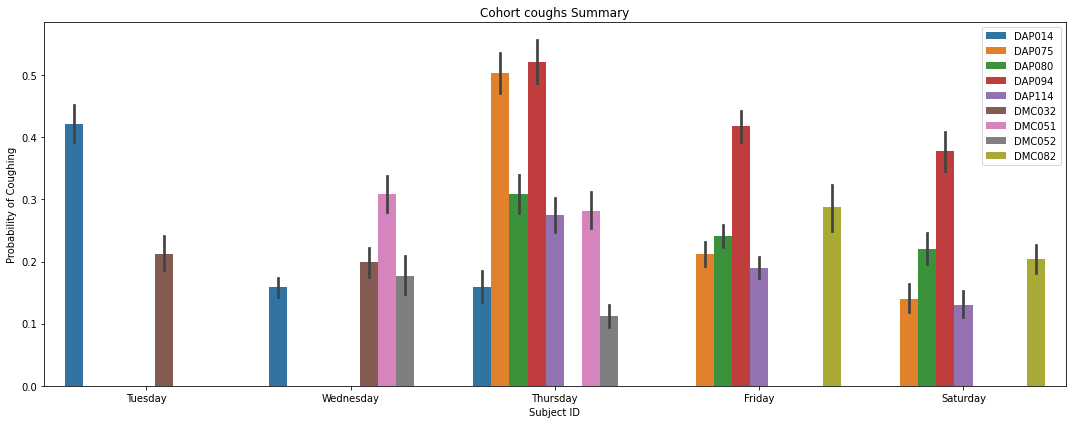

In [57]:
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x=all_coughs.index.day_name(), y='cough_prob', hue='subject_id', data=all_coughs)
# ax.axhline(y=all_coughs['cough_prob'].mean(), color='r', linestyle='--', label='Cohort Average Cough Probability')
ax.set_xlabel("Subject ID")
ax.set_ylabel("Probability of Coughing")
ax.set_title("Cohort coughs Summary")
plt.legend()
plt.tight_layout()
# plt.savefig("./plots/daphne/cohort_cough_summary.png", dpi=300)

Same plots but with sure coughs

In [58]:
sure_coughs = all_coughs[all_coughs.cough_prob > 0.99]

In [60]:
sure_coughs

,cough_prob,subject_id
timestamp,,
2019-06-04 10:47:00+05:30,0.999998,DAP014
2019-06-04 11:36:00+05:30,0.996591,DAP014
2019-06-04 11:51:00+05:30,0.999987,DAP014
2019-06-04 11:55:00+05:30,1.000000,DAP014
2019-06-04 11:57:00+05:30,1.000000,DAP014
...,...,...
2019-10-12 15:02:00+05:30,0.999644,DMC082
2019-10-12 15:34:00+05:30,0.997250,DMC082
2019-10-12 15:42:00+05:30,1.000000,DMC082


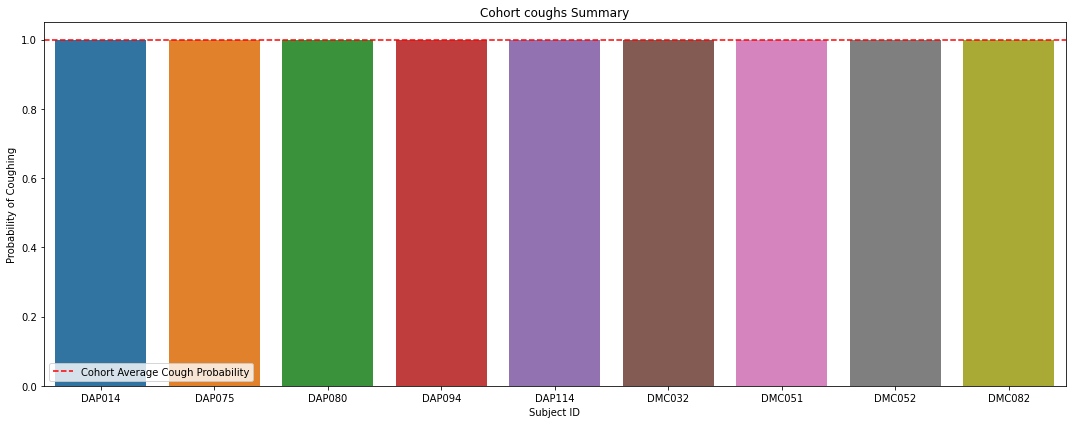

In [61]:
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x='subject_id', y='cough_prob', data=sure_coughs)
ax.axhline(y=sure_coughs['cough_prob'].mean(), color='r', linestyle='--', label='Cohort Average Cough Probability')
ax.set_xlabel("Subject ID")
ax.set_ylabel("Probability of Coughing")
ax.set_title("Cohort coughs Summary")
plt.legend()
plt.tight_layout()
# plt.savefig("./plots/daphne/cohort_cough_summary.png", dpi=300)

No handles with labels found to put in legend.


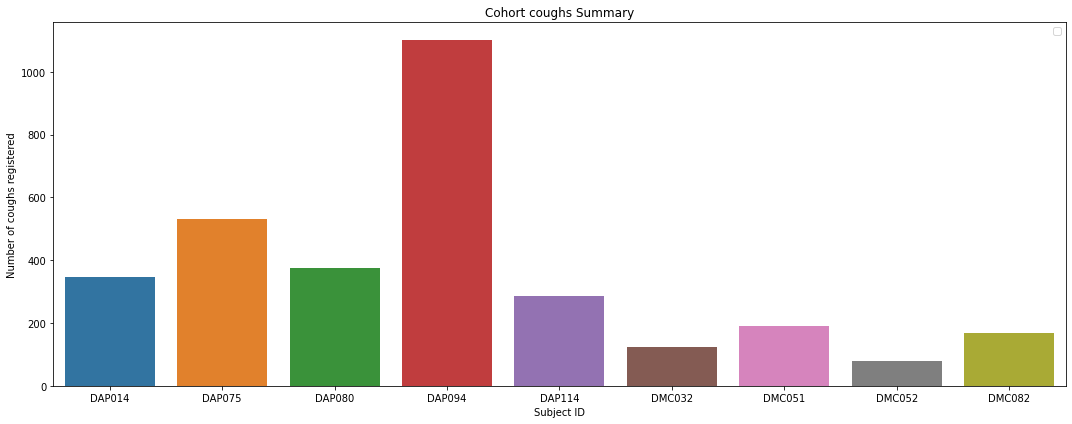

In [65]:
fig = plt.figure(figsize=(15, 6))
ax = sns.countplot(x='subject_id', data=sure_coughs)
# ax.axhline(y=sure_coughs['cough_prob'].mean(), color='r', linestyle='--', label='Cohort Average Cough Probability')
ax.set_xlabel("Subject ID")
ax.set_ylabel("Number of coughs registered")
ax.set_title("Cohort coughs Summary")
plt.legend()
plt.tight_layout()
plt.savefig("./plots/daphne/cohort_cough_number_summary.png", dpi=300)

In [68]:
sure_coughs['cohort'] = sure_coughs['subject_id'].str[:3]

/Users/teo/miniconda3/envs/specknet/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='subject_id', ylabel='count'>

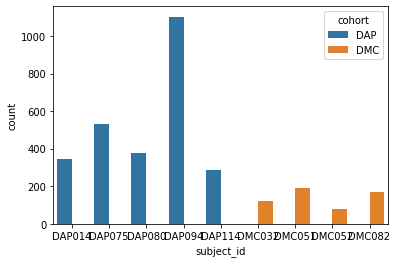

In [69]:
sns.countplot(x='subject_id', data=sure_coughs, hue='cohort')

In [72]:
sure_coughs.groupby(['cohort', 'subject_id']).count()

cough_prob
cohort subject_id            
DAP    DAP014             346
       DAP075             532
       DAP080             376
       DAP094            1102
       DAP114             285
DMC    DMC032             124
       DMC051             192
       DMC052              78
       DMC082             169

<AxesSubplot:xlabel='cohort', ylabel='cough_prob'>

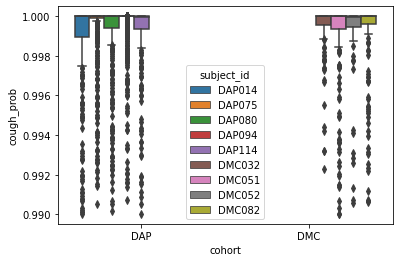

In [73]:
sns.boxplot(x=sure_coughs.cohort, y=sure_coughs.cough_prob, hue=sure_coughs.subject_id)